<a href="https://colab.research.google.com/github/chad-fisher/KansasWind/blob/main/KansasWindfarms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Machine Learning Enabled Suitability Analysis for Wind Farms in Kansas

By: The Leftovers (Chad, Ayah, Pratheek, Anat, Paula, & Prudhvi)

EM 212 | Applied Data Science | 5.9.24

This project was also delivered as a poster at the Tufts 2024 GIS Expo: https://expoexplorer.it.tufts.edu/posterform/media/pdf/0f980916-9841-4e60-9e70-1613382cdf9b.pdf


# 1.0 Problem Statement

1.1: Describe the project problem statement.

[In 2021, more than 9% of US energy came from wind](https://www.energy.gov/eere/wind/frequently-asked-questions-about-wind-energy), and generation capacity continues to grow across all 50 states  with billions invested in the sector. [At an average cost of $5 million for a 3 MW turbine](https://www.nrel.gov/docs/fy24osti/88335.pdf), the efficiency and longevity of turbine installations are pivotal for a high return on investment. As more and more areas look to move away from fossil fuels that are harmful to environmental and public health, finding areas that are suitable for utility-scale, land-based wind energy generation while minimizing effects on humans and wildlife will be essential. This work will investigate classic and modern approaches to suitability questions using a case study in Kansas, a leader in US wind energy.


1.2: How will the problem be tackled and solved?

This model will predict new ideal geographic locations for wind farms in Kansas by considering various factors such as wind speeds, topography, land cover change, human population density, and several others. We will start with a classic GIS suitability analysis where the weights are determined somewhat subjectively by the analyst. We will then use a random forest (RF) model to identify which are the most important factors that contribute to the geographic location of wind farms to see if the weights we predicted were founded in the data. In doing so, we can identify other ideal geographies which do not have many (or any) wind farms. We will train the RF on a subset of known wind turbine locations and then test it on the remaining data. We will then use it to generate a raster of suitable locations and their relative suitability. Such a model will be helpful in picking out new sites to build wind farms to progress efforts in expanding wind power as a renewable energy source.


1.3: What are the parameters around your problem statement to make it simple enough to solve, but not trivial?

Because we are looking for new sites to build wind farms, the most important parameters to consider are wind speeds, population density, and access to power lines.  High wind speeds are important for rotating the blades of the turbines and generating the most wattage of power. Population density is essential as wind farms should not disrupt the communities living in that area and thus cannot be built over cities and towns where people are already living. Access to power lines ensures that the infrastructure needed to deliver the power to surrounding areas exists and can be readily used.

We have selected Kansas as a first site to test our workflow on as Kansas is ranked 4th in the country for wind energy generation with over [4139 turbines in the state as of April 2024](https://eerscmap.usgs.gov/uswtdb/data/). [47% of the electrical capacity in Kansas comes from wind energy](https://windexchange.energy.gov/states/ks). This provides a simple geography that does not have large variations in topography, land use, or density, but is responsible for a large portion of the problem we aim to tackle.

1.4: What is the core business or research problem you are solving? Why is it important?

The core business or research problem we are tackling is identifying the best suitable spots to build wind farms in Kansas, while keeping the costs down and reducing harm to the people and wildlife. This is an important issue because wind farms are one of the key renewable energy resources that can help us reduce our dependence on fossil fuels, which are harmful to the environment and public health. By using a random forest model, we want to find out which factors like (windspeed, topography, deforestation, and human population density etc) matters the most when choosing where to put these wind farms. Our findings will help guide future projects in picking the best sites to expand wind power, which is crucial for our sustainable energy future.


# 2.0 Datasets

## Datasets used

There will be 6 main factors considered in the suitability analysis and as inputs to the RF. Training sites will be selected from existing wind turbine locations.



1. **Wind Speed**: this is critical to determining energy output of turbines
2. **Population Density**: building turbines in dense population areas is often not supported by residents and must compete with other land uses and high property values
3. **Elevation**: elevation can affect wind speed and the feasibility of construction
4. **Distance to Power Lines**: generated power will need to be connected to the grid or new infrastructure will need to be built to expand the grid to new sites
5. **Land Cover**: the land cover is inherently linked to the suitability
6. **Annual Precipitation**: relates to climactic and wind speed variables



## Downloading data

### Setup

In [ ]:
# Install needed packages on environment
!pip install matplotlib_scalebar contextily wget rasterstats rioxarray geocube

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.4/146.4 kB 7.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=06e40191865a43bad81559e7b5278ca2daeace9b9e0c0e4a3b9aac85d2afdee4
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# Install spatial RF package from GitHub
!pip install git+https://github.com/mie-lab/spatial_rf_python.git#egg=sprf

  Cloning https://github.com/mie-lab/spatial_rf_python.git to /tmp/pip-install-di63ngrh/sprf_d89dcee7a7064e1fbd40eef7ac880bde
  Running command git clone --filter=blob:none --quiet https://github.com/mie-lab/spatial_rf_python.git /tmp/pip-install-di63ngrh/sprf_d89dcee7a7064e1fbd40eef7ac880bde
  Resolved https://github.com/mie-lab/spatial_rf_python.git to commit 20d88253883492d81e62ae550a01ff2b8aaeed26
  Preparing metadata (setup.py) ... done
  Created wheel for sprf: filename=sprf-0.0.1-py3-none-any.whl size=9870 sha256=0d5cfd0758033caff96e876e7c27d37af62ffb11252d51972aef6105bd6938f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-i8an_u4f/wheels/8b/86/d5/fb2c74a3279dd89ff1d61d803d6aa49e21319509e573968048
Successfully built sprf


In [ ]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

import contextily as cx

import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.merge import merge
from rasterio.enums import Resampling
from rasterio.warp import calculate_default_transform, reproject, Resampling

import wget
import zipfile
import datetime
import urllib
import rasterstats
import glob

import sprf
from sprf.spatial_random_forest import SpatialRandomForest
from sprf.geographical_random_forest import GeographicalRandomForest

import rioxarray as rxr
import xarray
import fiona

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from shapely.geometry import Point

from geocube.api.core import make_geocube

### Downloads

In [ ]:
#Get Wind Turbine Data
!wget "https://eerscmap.usgs.gov/uswtdb/assets/data/uswtdbSHP.zip"
zipfile.ZipFile('uswtdbSHP.zip').extractall(path='/content/WTDB')

--2024-05-08 01:23:20--  https://eerscmap.usgs.gov/uswtdb/assets/data/uswtdbSHP.zip
Resolving eerscmap.usgs.gov (eerscmap.usgs.gov)... 137.227.248.56, 2001:49c8:0:126d::56
Connecting to eerscmap.usgs.gov (eerscmap.usgs.gov)|137.227.248.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4265263 (4.1M) [application/zip]
Saving to: ‘uswtdbSHP.zip’

uswtdbSHP.zip       100%[===================>]   4.07M   334KB/s    in 10s     

2024-05-08 01:23:31 (413 KB/s) - ‘uswtdbSHP.zip’ saved [4265263/4265263]



In [ ]:
# Get State outlines from census
!wget "https://www2.census.gov/geo/tiger/TIGER2023/STATE/tl_2023_us_state.zip"
zipfile.ZipFile('tl_2023_us_state.zip').extractall(path='/content/States')

--2024-05-08 01:23:32--  https://www2.census.gov/geo/tiger/TIGER2023/STATE/tl_2023_us_state.zip
Resolving www2.census.gov (www2.census.gov)... 23.48.179.105, 2600:1406:5800:3ad::208c, 2600:1406:5800:380::208c
Connecting to www2.census.gov (www2.census.gov)|23.48.179.105|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2023_us_state.zip’

tl_2023_us_state.zi     [  <=>               ]   9.49M  29.3MB/s    in 0.3s    

2024-05-08 01:23:33 (29.3 MB/s) - ‘tl_2023_us_state.zip’ saved [9947818]



In [ ]:
# Get NLCD data
!wget "https://s3-us-west-2.amazonaws.com/mrlc/nlcd_2021_land_cover_l48_20230630.zip"
zipfile.ZipFile('nlcd_2021_land_cover_l48_20230630.zip').extractall(path='/content/LandCover')

--2024-05-08 01:23:34--  https://s3-us-west-2.amazonaws.com/mrlc/nlcd_2021_land_cover_l48_20230630.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.212.232, 52.92.186.128, 52.218.168.64, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.212.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1958811487 (1.8G) [application/zip]
Saving to: ‘nlcd_2021_land_cover_l48_20230630.zip’

nlcd_2021_land_cove 100%[===================>]   1.82G  41.3MB/s    in 54s     

2024-05-08 01:24:28 (34.7 MB/s) - ‘nlcd_2021_land_cover_l48_20230630.zip’ saved [1958811487/1958811487]



In [ ]:
# Download wind speed data
!wget 'https://globalwindatlas3.s3-eu-west-1.amazonaws.com/country_tifs/USA_wind-speed_10m.tif'

--2024-05-08 01:28:01--  https://globalwindatlas3.s3-eu-west-1.amazonaws.com/country_tifs/USA_wind-speed_10m.tif
Resolving globalwindatlas3.s3-eu-west-1.amazonaws.com (globalwindatlas3.s3-eu-west-1.amazonaws.com)... 3.5.72.133, 52.218.109.120, 52.92.20.210, ...
Connecting to globalwindatlas3.s3-eu-west-1.amazonaws.com (globalwindatlas3.s3-eu-west-1.amazonaws.com)|3.5.72.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702896032 (670M) [image/tiff]
Saving to: ‘USA_wind-speed_10m.tif’

USA_wind-speed_10m. 100%[===================>] 670.33M  22.5MB/s    in 31s     

2024-05-08 01:28:32 (21.8 MB/s) - ‘USA_wind-speed_10m.tif’ saved [702896032/702896032]



In [ ]:
# Download DEM tiles
!wget 'https://tufts.box.com/shared/static/ti9me4c794p69w51ztfedwsu3au0r2qg.zip'
zipfile.ZipFile('/content/ti9me4c794p69w51ztfedwsu3au0r2qg.zip').extractall()

--2024-05-08 01:28:32--  https://tufts.box.com/shared/static/ti9me4c794p69w51ztfedwsu3au0r2qg.zip
Resolving tufts.box.com (tufts.box.com)... 74.112.186.144
Connecting to tufts.box.com (tufts.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/ti9me4c794p69w51ztfedwsu3au0r2qg.zip [following]
--2024-05-08 01:28:32--  https://tufts.box.com/public/static/ti9me4c794p69w51ztfedwsu3au0r2qg.zip
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/ti9me4c794p69w51ztfedwsu3au0r2qg.zip [following]
--2024-05-08 01:28:32--  https://tufts.app.box.com/public/static/ti9me4c794p69w51ztfedwsu3au0r2qg.zip
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.144
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

In [ ]:
# Download power lines data
!wget 'https://tufts.box.com/shared/static/lw7aasw5fvm7z60l6qh1p75h92bzt4j4.zip'
zipfile.ZipFile('/content/lw7aasw5fvm7z60l6qh1p75h92bzt4j4.zip').extractall(path = 'PowerLines')

--2024-05-08 01:28:46--  https://tufts.box.com/shared/static/lw7aasw5fvm7z60l6qh1p75h92bzt4j4.zip
Resolving tufts.box.com (tufts.box.com)... 74.112.186.144
Connecting to tufts.box.com (tufts.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/lw7aasw5fvm7z60l6qh1p75h92bzt4j4.zip [following]
--2024-05-08 01:28:46--  https://tufts.box.com/public/static/lw7aasw5fvm7z60l6qh1p75h92bzt4j4.zip
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/lw7aasw5fvm7z60l6qh1p75h92bzt4j4.zip [following]
--2024-05-08 01:28:46--  https://tufts.app.box.com/public/static/lw7aasw5fvm7z60l6qh1p75h92bzt4j4.zip
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.144
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

In [ ]:
# Get population density shapefiles and table
# table from https://data.census.gov/table/ACSDT5Y2022.B01001?t=Populations%20and%20People&g=040XX00US20$1500000&y=2022
!wget 'https://tufts.box.com/shared/static/vnp1c8e89ct7n5ugrp978nz8iqk32qgv.zip'
zipfile.ZipFile('/content/vnp1c8e89ct7n5ugrp978nz8iqk32qgv.zip').extractall(path = 'PopData')

--2024-05-08 01:28:47--  https://tufts.box.com/shared/static/vnp1c8e89ct7n5ugrp978nz8iqk32qgv.zip
Resolving tufts.box.com (tufts.box.com)... 74.112.186.144
Connecting to tufts.box.com (tufts.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/vnp1c8e89ct7n5ugrp978nz8iqk32qgv.zip [following]
--2024-05-08 01:28:47--  https://tufts.box.com/public/static/vnp1c8e89ct7n5ugrp978nz8iqk32qgv.zip
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/vnp1c8e89ct7n5ugrp978nz8iqk32qgv.zip [following]
--2024-05-08 01:28:47--  https://tufts.app.box.com/public/static/vnp1c8e89ct7n5ugrp978nz8iqk32qgv.zip
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.144
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

In [ ]:
# Get annual precipitation totals
!wget 'https://tufts.box.com/shared/static/whdmmxe2guifgcou5ho9w5ko0gn7lwgo.zip'
zipfile.ZipFile('/content/whdmmxe2guifgcou5ho9w5ko0gn7lwgo.zip').extractall(path='AnnualPrecipitation')

--2024-05-08 01:28:48--  https://tufts.box.com/shared/static/whdmmxe2guifgcou5ho9w5ko0gn7lwgo.zip
Resolving tufts.box.com (tufts.box.com)... 74.112.186.144
Connecting to tufts.box.com (tufts.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/whdmmxe2guifgcou5ho9w5ko0gn7lwgo.zip [following]
--2024-05-08 01:28:48--  https://tufts.box.com/public/static/whdmmxe2guifgcou5ho9w5ko0gn7lwgo.zip
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/whdmmxe2guifgcou5ho9w5ko0gn7lwgo.zip [following]
--2024-05-08 01:28:48--  https://tufts.app.box.com/public/static/whdmmxe2guifgcou5ho9w5ko0gn7lwgo.zip
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.144
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

# 3.0 Data Cleaning

After downloading all the datasets, they were first preliminarily cleaned in Colab, but some cleaning was so intensive that it was done using an ArcPy notebook in ArcGIS Pro. The data cleaning was the most significant portion of effort in the entire project, as each dataset was assessed in detail, and further manipulations were needed to ensure that all the datasets could work together for data visualization and model building.


## In Colab

Wind Turbine Sites

In [ ]:
# Open, subset, and reproject KS wind turbines
path='/content/WTDB/uswtdb_v6_1_20231128.shp'
KS_WT = gpd.read_file(path)[gpd.read_file(path)['t_state'] == 'KS']
KansasWindTurbines_Reprojected = KS_WT.to_crs(epsg=3857)
print(KS_WT.count())

# Get rid of no data (-9999) values
KansasWindTurbines_Reprojected=KansasWindTurbines_Reprojected[KansasWindTurbines_Reprojected['p_cap']>0]

# Calculate average capacity of wind turbine from total proiject capacity divided from number of turbines
KansasWindTurbines_Reprojected['Avg_Cap']=KansasWindTurbines_Reprojected['p_cap']/KansasWindTurbines_Reprojected['p_tnum']

case_id       4139
faa_ors       4139
faa_asn       4139
usgs_pr_id    4139
eia_id        4139
t_state       4139
t_county      4139
t_fips        4139
p_name        4139
p_year        4139
p_tnum        4139
p_cap         4139
t_manu        4139
t_model       4139
t_cap         4139
t_hh          4139
t_rd          4139
t_rsa         4139
t_ttlh        4139
retrofit      4139
retrofit_y    4139
t_conf_atr    4139
t_conf_loc    4139
t_img_date    4139
t_img_srce    4139
xlong         4139
ylat          4139
geometry      4139
dtype: int64


State Boundaries

In [ ]:
# Extract Kansas boundaries
StatesMap = gpd.read_file('/content/States/tl_2023_us_state.shp')
KS_StateMap = StatesMap[StatesMap['NAME'] == 'Kansas']

National Land Cover Database recoding

In [ ]:
KS_LandCover,trans = rio.mask.mask(rio.open('/content/LandCover/nlcd_2021_land_cover_l48_20230630.img'),KS_StateMap.to_crs(rio.open('/content/LandCover/nlcd_2021_land_cover_l48_20230630.img').crs).geometry,crop=True, filled=False)

# Recode NLCD database codes to make them evenly spaced for mapping and use in model
recode=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
nlcd_codes = [0, 11, 12, 21, 22, 23, 24, 31, 41, 42, 43, 52, 71, 81, 82, 90, 95]
for i in recode:
  KS_LandCover[KS_LandCover==nlcd_codes[i]]=i

Windspeed masking and reprojecting

In [ ]:
# Mask windspeed data
with rio.open('/content/USA_wind-speed_10m.tif') as src:
    out_meta = src.meta
    out_image, out_transform = rio.mask.mask(src, shapes=KS_StateMap.to_crs(4326).geometry, crop=True)


    profile = src.profile
    profile["height"] = out_image.shape[1]
    profile["width"] = out_image.shape[2]
    profile["transform"] = out_transform


    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open("wind2023.tif", "w", **out_meta) as dest:
    dest.write(out_image)

#Reproject windspeed data
dst_crs = 'EPSG:3857'

with rio.open('wind2023.tif') as src:

    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    with rio.Env(CHECK_DISK_FREE_SPACE="NO"):
        with rio.open('/content/WindSpeed_Reprojected.tif', 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rio.band(src, i),
                    destination=rio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)

Mosaic DEM tiles together

In [ ]:
# Mosaic DEM tiles
DEM_list=glob.glob('/content/DEM/*.tif')
src_files_to_mosaic = []
for fp in DEM_list:
  src = rio.open(fp)
  src_files_to_mosaic.append(src)
mosaic, out_trans = merge(src_files_to_mosaic)
out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff",
"height": mosaic.shape[1],
"width": mosaic.shape[2],"transform": out_trans,"crs": "+proj=longlat +datum=WGS84 +no_defs"})

with rio.open("mosaic.tif", "w", **out_meta) as dest:
    dest.write(mosaic)

Power lines data does not need to be cleaned

In [ ]:
# Read power lines data
powerLines = gpd.read_file('/content/PowerLines/Electric_Power_Transmission_Lines_A.shp')

Joining population data onto the block groups and calculating population density

In [ ]:
# Read Population data
Pop_Data=pd.read_csv('/content/PopData/PopData/PopData.csv')
KS_BG=gpd.read_file('/content/PopData/PopData/tl_2023_20_bg.shp')

# Fix GEOIDs to match for join
Pop_Data['Fix_ID']=Pop_Data['GEO_ID'].str[-7:]
KS_BG['ID']=KS_BG['GEOIDFQ'].str[-7:]

# Attribute join
KS_Pop = KS_BG.merge(Pop_Data, left_on='ID',right_on='Fix_ID')

# Calculate population density using joined data
KS_Pop['PopDens']=KS_Pop['Total_Pop']/KS_Pop['ALAND']

Joining precipitaiton data onto county shapefile

In [ ]:
# Read files
annual_precip = pd.read_csv('/content/AnnualPrecipitation/AnnualPrecipitation/PrecipTotal-2023.csv')
UScounties = gpd.read_file('/content/AnnualPrecipitation/AnnualPrecipitation/tl_2023_us_county.shp')

# Only use KS counties
KS_counties = UScounties[UScounties['STATEFP'] == '20']

# Join the data together
KS_counties_precip = KS_counties.merge(annual_precip, left_on='NAME',right_on='County')

## Additional cleaning in ArcGIS using ArcPy

### Export working data

In [ ]:
# Export precipitation data as shapefile
KS_counties_precip.to_file('KS_Counties.shp')

In [ ]:
# Export popultation density as shapefile
KS_Pop.to_file('PopDens.shp')

In [ ]:
# Export land cover data as TIF
with rio.open('/content/LandCover/nlcd_2021_land_cover_l48_20230630.img') as src:
    out_meta = src.meta
    out_image, out_transform = rio.mask.mask(src, shapes=KS_StateMap.to_crs(src.crs).geometry, crop=True)


    profile = src.profile
    profile["height"] = out_image.shape[1]
    profile["width"] = out_image.shape[2]
    profile["transform"] = out_transform


    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open("Ks_NLCD.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [ ]:
# Export mosaic of DEM as TIF
with rio.open('/content/DEM/ASTGTMV003_N36W094_dem.tif') as src:
    out_meta = src.meta
    profile = src.profile
    profile["height"] = mosaic.shape[1]
    profile["width"] = mosaic.shape[2]
    profile["transform"] = out_trans


    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open("mosaic.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [ ]:
# Export wind speed data as TIF
with rio.open('/content/USA_wind-speed_10m.tif') as src:
    out_meta = src.meta
    out_image, out_transform = rio.mask.mask(src, shapes=KS_StateMap.to_crs(4326).geometry, crop=True)


    profile = src.profile
    profile["height"] = out_image.shape[1]
    profile["width"] = out_image.shape[2]
    profile["transform"] = out_transform


    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rio.open("wind2023.tif", "w", **out_meta) as dest:
    dest.write(out_image)

All datasets were rasterized, clipped, and reprojected as needed to the same 30 m cell size for use in a suitability analysis. The distance to Power Lines was calculated in ArcGIS as a raster layer. The full notebook of steps performed can be viewed here: https://tufts.box.com/shared/static/4gwnz8xlch37qkyh8q6j9zg18ckactux.ipynb

In [ ]:
# Get Cleaned Data from ArcGIS
!wget "https://tufts.box.com/shared/static/jr0cmw6ft5vvkd8gkdjcexva5pfqsald.zip"
zipfile.ZipFile('/content/jr0cmw6ft5vvkd8gkdjcexva5pfqsald.zip').extractall()

--2024-05-08 01:34:16--  https://tufts.box.com/shared/static/jr0cmw6ft5vvkd8gkdjcexva5pfqsald.zip
Resolving tufts.box.com (tufts.box.com)... 74.112.186.144
Connecting to tufts.box.com (tufts.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/jr0cmw6ft5vvkd8gkdjcexva5pfqsald.zip [following]
--2024-05-08 01:34:16--  https://tufts.box.com/public/static/jr0cmw6ft5vvkd8gkdjcexva5pfqsald.zip
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/jr0cmw6ft5vvkd8gkdjcexva5pfqsald.zip [following]
--2024-05-08 01:34:16--  https://tufts.app.box.com/public/static/jr0cmw6ft5vvkd8gkdjcexva5pfqsald.zip
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.144
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

# 4.0 Data Visualization

Wind Turbine Maps

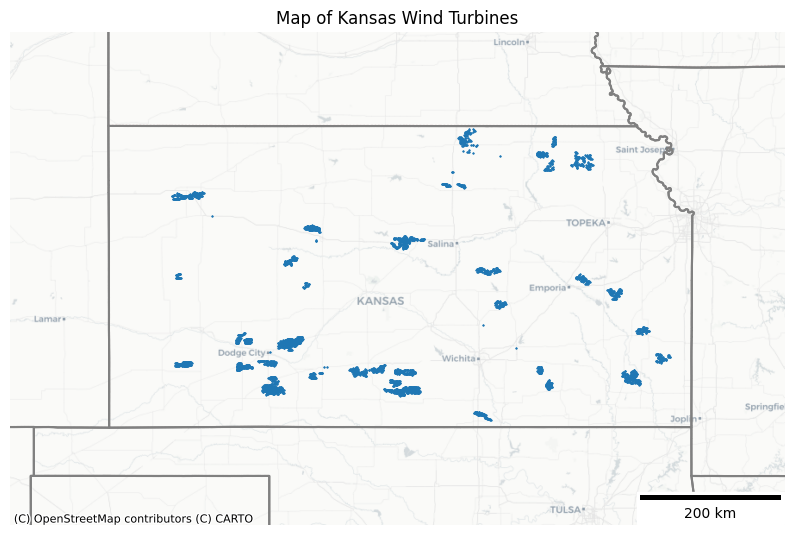

In [ ]:
# Generate map
ax = KS_WT.to_crs(epsg=3857).plot(figsize=(10,10),marker='*',markersize=0.5)
StatesMap.to_crs(epsg=3857).boundary.plot(ax=ax, color = 'gray')

#Change zoom/extent of map using coordinates in relevant CRS
plt.xlim(-1.15e7, -1.04e7)
plt.ylim(4.3e6, 5e6)

#Modify and save map
plt.title("Map of Kansas Wind Turbines")
cx.add_basemap(ax,source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
ax.add_artist(ScaleBar(1,location='lower right'))
plt.savefig("KansasWindTurbinesMap.png")

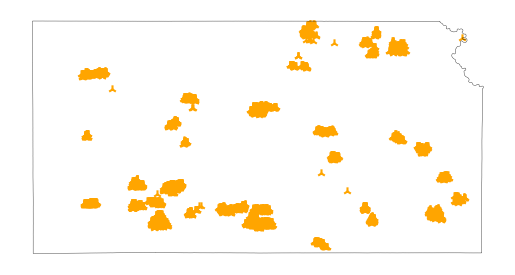

In [ ]:
ax=KS_WT.plot(marker='2',color='orange')
KS_StateMap.boundary.plot(ax=ax,color='black',linewidth=0.25)
ax.axis('off')
plt.savefig('WindTurbines.png',transparent=True,dpi=300,bbox_inches='tight')

Land Cover Data

In [ ]:
#open cleaned image from ArcGIS
KS_LandCover,trans = rio.mask.mask(rio.open('/content/Cleaned Data/KS_NLCD_Cleaned.tif'),KS_StateMap.to_crs(epsg=3857).geometry,crop=True, filled=False)

# Recode NLCD database codes to make them evenly spaced for mapping and use in model
recode=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
nlcd_codes = [0, 11, 12, 21, 22, 23, 24, 31, 41, 42, 43, 52, 71, 81, 82, 90, 95]
for i in recode:
  KS_LandCover[KS_LandCover==nlcd_codes[i]]=i

In [ ]:
# Create custom colormap based on recoded values
nlcd_colors = ['#ffffff', '#476ba0', '#d1def8', '#decaca', '#d99482', '#ee0000', '#ab0000',
               '#b3aea3', '#68ab63', '#1c6330', '#b5ca8f', '#a68c30', '#ccba7d', '#e3e3c2',
               '#caca78', '#99c247', '#78ae94']

cmap = mpl.colors.ListedColormap(nlcd_colors)
norm = mpl.colors.BoundaryNorm(recode,
                    len(nlcd_colors))

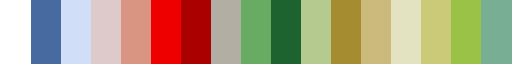

In [ ]:
#Test colormap
cmap

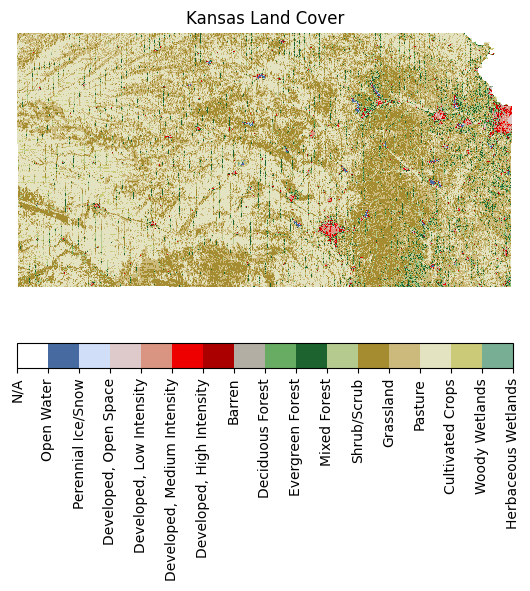

In [ ]:
#Initialize plot
fig, ax = plt.subplots()
plt.title('Kansas Land Cover')

# Create hidden image for colorbar and actual image
hidden=ax.imshow(KS_LandCover[0,:,:],cmap=cmap,norm=norm)
show(KS_LandCover,ax=ax,cmap=cmap,norm=norm)
cbar= fig.colorbar(hidden, ticks=recode, ax=ax,location='bottom')
labels=['N/A','Open Water','Perennial Ice/Snow','Developed, Open Space','Developed, Low Intensity','Developed, Medium Intensity','Developed, High Intensity','Barren','Deciduous Forest','Evergreen Forest','Mixed Forest','Shrub/Scrub','Grassland','Pasture','Cultivated Crops','Woody Wetlands','Herbaceous Wetlands']
cbar.set_ticks(ticks=recode,labels=labels)
cbar.ax.tick_params(rotation=90)

#Save plot as png
ax.set_axis_off()
fig.savefig('Kansas Land Cover.png')

Wind Speed Data

In [ ]:
#Open reprojected and masked data
wind2023 = rio.open('WindSpeed_Reprojected.tif').read(1)

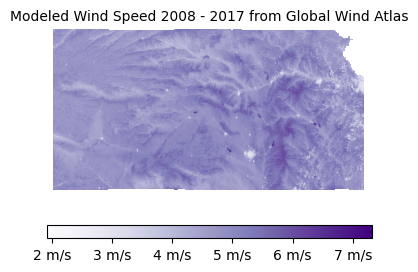

In [ ]:
#Initialize plot
fig, ax =plt.subplots(figsize=(6,3))
plt.title('Modeled Wind Speed 2008 - 2017 from Global Wind Atlas',size = 'medium')

# Create hidden image for colorbar and actual image
hidden = ax.imshow(wind2023,cmap = 'Purples')
img = show(wind2023, ax = ax, cmap = 'Purples')
fig.colorbar(hidden, cmap = 'Purples', shrink=.7, orientation = 'horizontal', aspect = 25, format = "%i m/s")

# Save plot
ax.axis('off')
fig.savefig('Wind Kansas Map')

DEM Data

In [ ]:
# Import cleaned DEM mosaic
mos = rio.open('/content/Cleaned Data/DEM_Cleaned.tif')

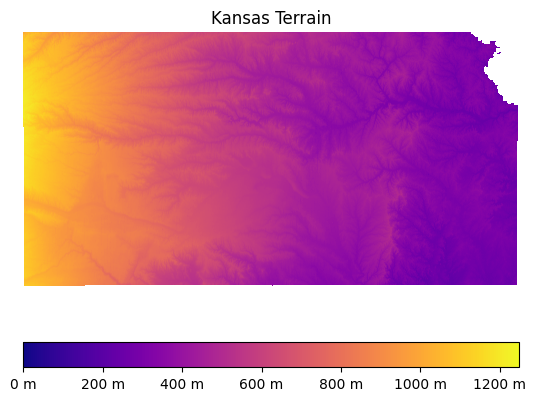

In [ ]:
# Initialize plots
fig,ax=plt.subplots()

# Mask to Kansas
mosaic,trans=rio.mask.mask(mos, shapes=KS_StateMap.to_crs(3857).geometry, crop=True,filled=False,nodata=0)
plt.title('Kansas Terrain',size='large')

# Create hidden image for colorbar and actual image
hidden=ax.imshow(mosaic[0,:,:],cmap='plasma',vmin=0)
show(mosaic,cmap='plasma',ax=ax,vmin=0)
fig.colorbar(hidden,cmap='plasma',orientation='horizontal',format="%i m")

# Save plot
ax.axis('off')
fig.savefig('Terrain Map.png')

Power Lines Data

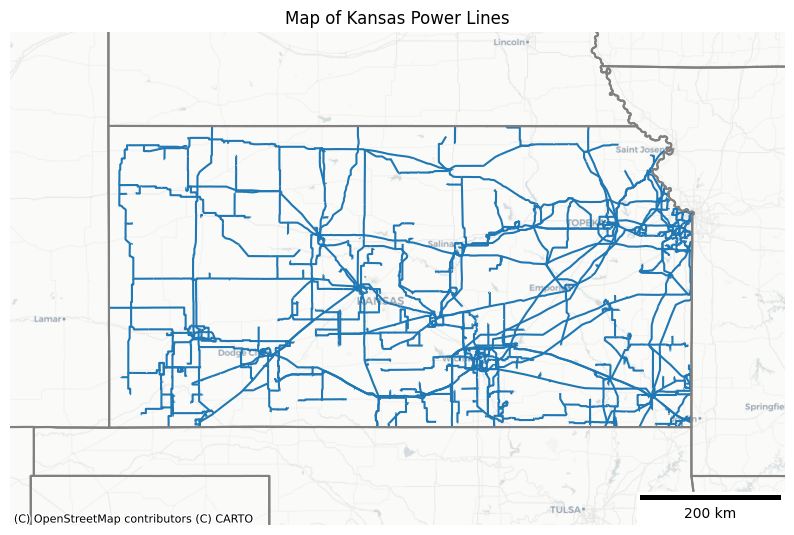

In [ ]:
# Make map
ax = powerLines.to_crs(epsg=3857).clip(KS_StateMap.to_crs(epsg=3857)).plot(figsize=(10,10))
StatesMap.to_crs(epsg=3857).boundary.plot(ax=ax, color = 'gray')

# Change zoom
plt.xlim(-1.15e7, -1.04e7)
plt.ylim(4.3e6, 5e6)

# Finalize and save
plt.title("Map of Kansas Power Lines")
cx.add_basemap(ax,source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
ax.add_artist(ScaleBar(1,location='lower right'))
plt.savefig("Kansas Power Lines.png")

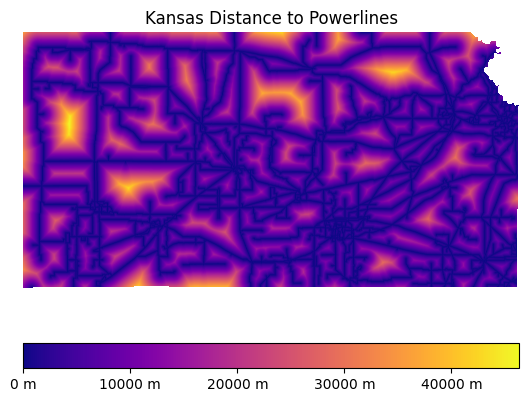

In [ ]:
src2 = rio.open('/content/Cleaned Data/Distance_PL.tif')
# Initialize plots
fig,ax=plt.subplots()

# Mask to Kansas
img,trans=rio.mask.mask(src2, shapes=KS_StateMap.to_crs(3857).geometry, crop=True,filled=False,nodata=0)
plt.title('Kansas Distance to Powerlines',size='large')

# Create hidden image for colorbar and actual image
hidden=ax.imshow(img[0,:,:],cmap='plasma',vmin=0)
show(img,cmap='plasma',ax=ax,vmin=0)
fig.colorbar(hidden,cmap='plasma',orientation='horizontal',format="%i m")

# Save plot
ax.axis('off')
fig.savefig('Powerlines.png')

Population Density Data

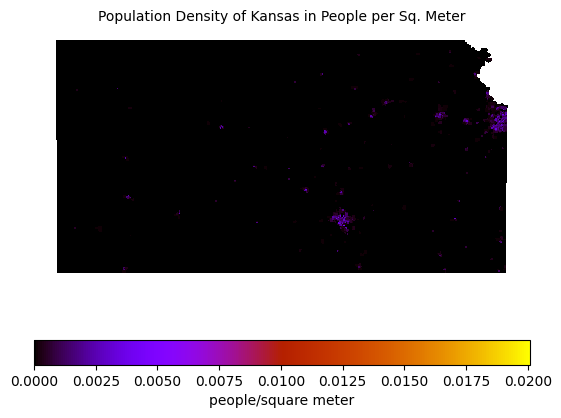

In [ ]:
# Plot data
fig,ax=plt.subplots()
KS_Pop.plot(column='PopDens',legend=True,cmap='gnuplot',ax=ax,legend_kwds={'location':'bottom','format':'%.4f','label':'people/square meter'},antialiased=False)

#Finalize and save
ax.axis('off')
plt.title('Population Density of Kansas in People per Sq. Meter',fontdict={'fontsize': 10})
fig.savefig('Population Density.png')

Annual Precipation

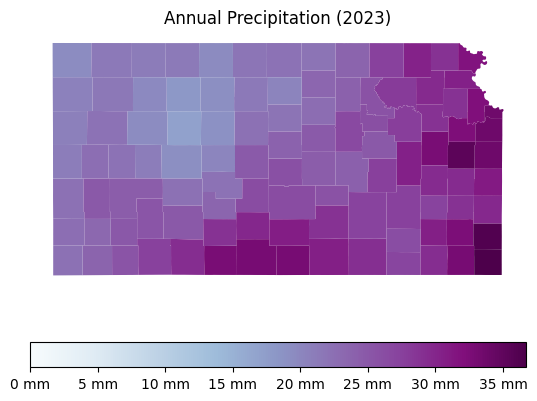

In [ ]:
# Plot precipitation data
fig,ax=plt.subplots()
KS_counties_precip.to_crs(epsg=3857).plot(column='Total',legend=True,legend_kwds={'location':'bottom','format':'%i mm'},cmap='BuPu',ax=ax,vmin=0)
ax.axis('off')
plt.title('Annual Precipitation (2023)',fontdict={'fontsize': 12})
fig.savefig('Precipitation.png')

Average wind turbine capacity map

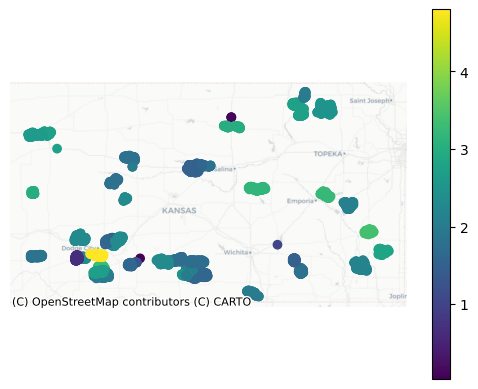

In [ ]:
# Plot data
ax= KansasWindTurbines_Reprojected.plot(column='Avg_Cap',cmap='viridis',legend=True)
cx.add_basemap(ax,source=cx.providers.CartoDB.Positron)
plt.axis('off')
plt.show()

# 5.0 Model Building

## Classic Suitability Analysis

Performed in ArcGIS using the following script: https://tufts.box.com/shared/static/4gwnz8xlch37qkyh8q6j9zg18ckactux.ipynb

Weights were assigned as followed:
* Land Cover 10%
* Elevation 5%
* Distance to Power Lines 30%
* Population 10%
* Rainfall 5%
* Wind Speed 40%



With counties outlines: https://tufts.box.com/s/40sj0pld19p6s1h62l9tahpf0adbg0wh

Without counties outlines: https://tufts.box.com/s/6tkk4v96feeu90ab227imgkb3jqyuzw9

## Spatial Random Forest

### Setup and bring in cleaned data

In [ ]:
# Extract only columns of interest
sites = KansasWindTurbines_Reprojected[['Avg_Cap','geometry']]

# Extract coordinate info from geometry column
sites['x'] = sites['geometry'].x
sites['y'] = sites['geometry'].y

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Extract raster data from each of the 6 rasters for the locations of the turbines
sites.index = range(len(sites))
coords = [(x,y) for x, y in zip(sites.x, sites.y)]
src1 = rio.open('/content/Cleaned Data/DEM_Cleaned.tif')
src2 = rio.open('/content/Cleaned Data/Distance_PL.tif')
src3 = rio.open('/content/Cleaned Data/KS_NLCD_Cleaned.tif')
src4 = rio.open('/content/Cleaned Data/PopDensity.tif')
src5 = rio.open('/content/Cleaned Data/Precip.tif')
src6 = rio.open('/content/Cleaned Data/wind2023_proj.tif')

sites['DEM'] = [x[0] for x in src1.sample(coords)]
sites['Dist_PL']= [x[0] for x in src2.sample(coords)]
sites['LC']= [x[0] for x in src3.sample(coords)]
sites['PopDens'] = [x[0] for x in src4.sample(coords)]
sites['Precip'] = [x[0] for x in src5.sample(coords)]
sites['Wind']= [x[0] for x in src6.sample(coords)]

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
# Drop geometry column because just need the coordinates
sites=sites.drop('geometry',axis=1)

In [ ]:
# Determine number of sites in test and train sets
frac_test=0.3
rng = np.random.default_rng(seed=121)
L=sites.shape[0]
M=int(L*(1-frac_test))
N=int(L*frac_test)

In [ ]:
# Randomly select the indices for the needed number of examples from the set for train
train_indices=rng.choice(np.arange(0,L), size = M, replace = False, p = None)

# The test indices are the other rows that were not selected
test_indices=np.arange(0,L)[~np.isin(np.arange(0,L),train_indices)]

# Use indices to generate final arrays
train=sites.iloc[train_indices]
test=sites.iloc[test_indices]

In [ ]:
# Prepare data function from SPRF demo notebook on GitHub
def prepare_data(data, target, lon="x", lat="y"):
    """Assumes that all other columns are used as covariates"""
    covariates = [col for col in data.columns if col not in [lon, lat, target]]
    return data[covariates], data[target], data[[lon, lat]]

In [ ]:
# split into x, y, and coordinates
train_x, train_y, train_coords = prepare_data(
    train, 'Avg_Cap'
)
test_x, test_y, test_coords = prepare_data(
    test, 'Avg_Cap'
)

In [ ]:
# Setting starting hyperparamaters for RF
n_estimators = 100
max_depth = 10
spatial_neighbors = len(sites) // 5

### Train/Test Basic RF

In [ ]:
# Training and testing basic RF
rf = RandomForestRegressor(max_depth=max_depth)
rf.fit(train_x, train_y)
test_pred_rf = rf.predict(test_x)

rmse_rf = mean_squared_error(test_pred_rf, test_y, squared=False)
print("Error of basic Random Forest: ", rmse_rf)

Error of basic Random Forest:  0.22422411101310935


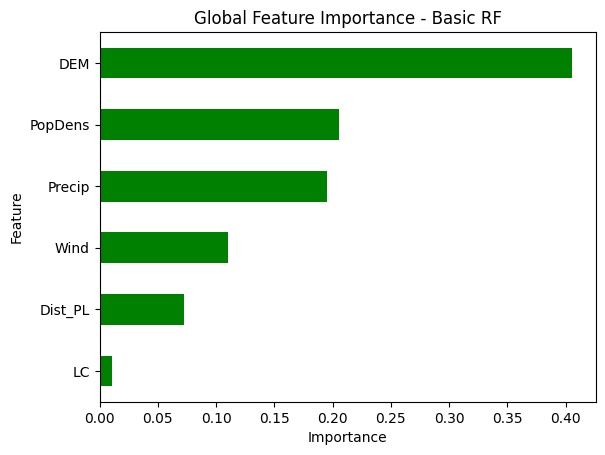

In [ ]:
# Generating plot of feature importance from basic RF (not available for 2 spatial models)
global_importances = pd.Series(rf.feature_importances_, index=train_x.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances[-10:].plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Basic RF")
plt.savefig('Feature Importance.png')

### Train/Test Spatial RF

In [ ]:
# Training and testing spatial RF
sp = SpatialRandomForest(
    max_depth=max_depth, neighbors=spatial_neighbors
)
sp.fit(train_x, train_y, train_coords)
test_pred_sp = sp.predict(test_x, test_coords)

rmse_spatial_rf = mean_squared_error(test_pred_sp, test_y, squared=False)
print("Error of spatial Random Forest: ", rmse_spatial_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error of spatial Random Forest:  0.3388921051003216


### Train/Test Tuned Spatial RF

In [ ]:
# Tuning spatial random forest for number of neighbors
regr = SpatialRandomForest(
        n_estimators=n_estimators, neighbors=500, max_depth=max_depth
    )
regr.tune_neighbors(train_x, train_y, train_coords)
print("spatial rf tuned:", regr.neighbors)
regr.fit(train_x, train_y, train_coords)
test_pred_tune = regr.predict(test_x, test_coords)
rmse_spatial_rf_tuned = mean_squared_error(test_pred_tune, test_y, squared=False)
print("Error of tuned spatial Random Forest: ", rmse_spatial_rf_tuned)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

spatial rf tuned: 2498


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Error of tuned spatial Random Forest:  0.26738249368686084


### Train/Test Geographic RF

In [ ]:
# Train and test geographic RF
geo_rf = GeographicalRandomForest(
    n_estimators=n_estimators, neighbors=spatial_neighbors, max_depth=max_depth
)
geo_rf.fit(train_x, train_y, train_coords)
test_pred_geo = geo_rf.predict(test_x, test_coords)

rmse_geo_rf = mean_squared_error(test_pred_geo, test_y, squared=False)
print("Error of geographic Random Forest: ", rmse_geo_rf)

Error of geographic Random Forest:  0.25428578278647196


### Comparing RF Predictions

In [ ]:
# Storing predictions on test dataset from each of the 4 RF models
test['RFPrediction']=test_pred_rf
test['SPRFPrediction']=test_pred_sp
test['TunePrediction']=test_pred_tune
test['GeoPrediction']=test_pred_geo

<ipython-input-21-cd2b40b2d05d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['RFPrediction']=test_pred_rf
<ipython-input-21-cd2b40b2d05d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SPRFPrediction']=test_pred_sp
<ipython-input-21-cd2b40b2d05d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
# Converting data into geodataframe for mapping
test_gdf = gpd.GeoDataFrame(
    test, geometry=gpd.points_from_xy(test.x, test.y), crs="EPSG:3857"
)

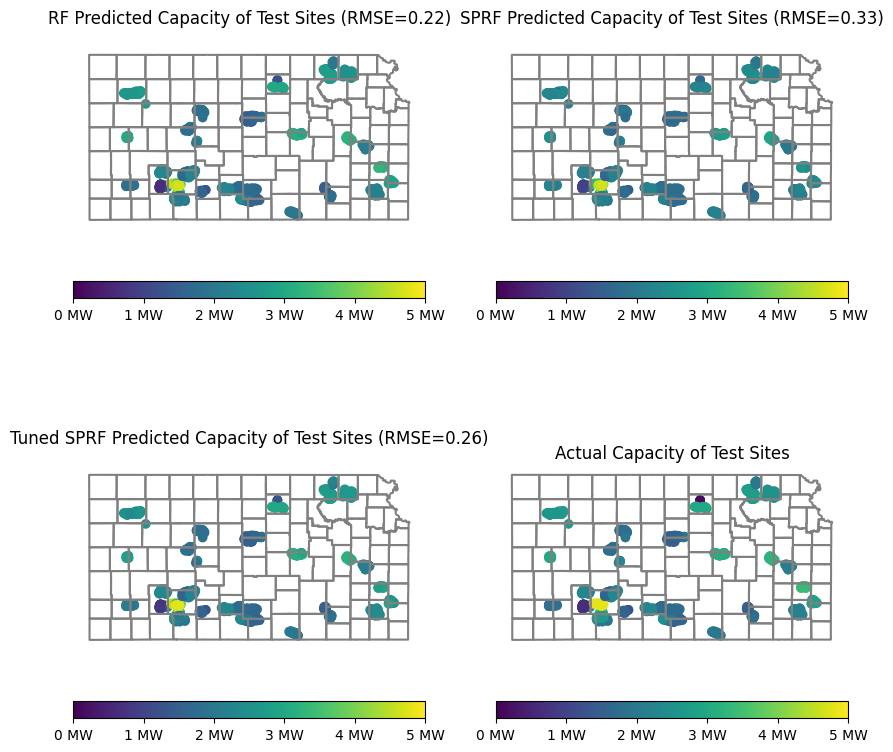

In [ ]:
# Plotting predictions of each of the 3 models and the actual value from the USWTDB
fig,ax=plt.subplots(2,2,figsize=(10,10))

test_gdf.plot(column='RFPrediction',ax=ax[0,0],legend=True,legend_kwds={'location':'bottom','format':'%i MW'},vmin=0,vmax=5)
KS_counties.to_crs(epsg=3857).boundary.plot(ax=ax[0,0], color = 'gray')
ax[0,0].axis('off')
ax[0,0].set_title('RF Predicted Capacity of Test Sites'+' (RMSE='+str(rmse_rf)[:4]+')')

test_gdf.plot(column='SPRFPrediction',ax=ax[0,1],legend=True,legend_kwds={'location':'bottom','format':'%i MW'},vmin=0,vmax=5)
KS_counties.to_crs(epsg=3857).boundary.plot(ax=ax[0,1], color = 'gray')
ax[0,1].axis('off')
ax[0,1].set_title('SPRF Predicted Capacity of Test Sites'+' (RMSE='+str(rmse_spatial_rf)[:4]+')')

test_gdf.plot(column='TunePrediction',ax=ax[1,0],legend=True,legend_kwds={'location':'bottom','format':'%i MW'},vmin=0,vmax=5)
KS_counties.to_crs(epsg=3857).boundary.plot(ax=ax[1,0], color = 'gray')
ax[1,0].axis('off')
ax[1,0].set_title('Tuned SPRF Predicted Capacity of Test Sites'+' (RMSE='+str(rmse_spatial_rf_tuned)[:4]+')')

test_gdf.plot(column='Avg_Cap',ax=ax[1,1],legend=True,legend_kwds={'location':'bottom','format':'%i MW'},vmin=0,vmax=5)
KS_counties.to_crs(epsg=3857).boundary.plot(ax=ax[1,1], color = 'gray')
ax[1,1].axis('off')
ax[1,1].set_title('Actual Capacity of Test Sites')

fig.savefig('Predicted Capacity.png')

### Create grid of data for prediction maps

Generated a square tesselation in ArcGIS with 600 m x 600 m squares converted to centroids for prediction points. This was done in the script from earlier: https://tufts.box.com/shared/static/4gwnz8xlch37qkyh8q6j9zg18ckactux.ipynb

In [ ]:
# Download validation points generated in ArcGIS
!wget https://tufts.box.com/shared/static/2nw88pxderrdcadkcwo16y08t7shaxn2.zip
zipfile.ZipFile('2nw88pxderrdcadkcwo16y08t7shaxn2.zip').extractall('/content/ValidationPoints')

--2024-05-08 02:03:12--  https://tufts.box.com/shared/static/2nw88pxderrdcadkcwo16y08t7shaxn2.zip
Resolving tufts.box.com (tufts.box.com)... 74.112.186.144
Connecting to tufts.box.com (tufts.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/2nw88pxderrdcadkcwo16y08t7shaxn2.zip [following]
--2024-05-08 02:03:12--  https://tufts.box.com/public/static/2nw88pxderrdcadkcwo16y08t7shaxn2.zip
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/2nw88pxderrdcadkcwo16y08t7shaxn2.zip [following]
--2024-05-08 02:03:12--  https://tufts.app.box.com/public/static/2nw88pxderrdcadkcwo16y08t7shaxn2.zip
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.144
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

In [ ]:
# Read validation points
validation=gpd.read_file('/content/ValidationPoints/AllPts.shp',driver='pyogrio')[['geometry']].clip(KS_StateMap.to_crs(3857).geometry)

In [ ]:
# Extract x and y coordinates (in EPSG 3867) for each validation point
validation['x'] = validation['geometry'].x
validation['y'] = validation['geometry'].y

### Predict with RF regressor

In [ ]:
# Extract values of the 6 rasters at each of the validation points
validation.index = range(len(validation))
coords = [(x,y) for x, y in zip(validation.x, validation.y)]
src1 = rio.open('/content/Cleaned Data/DEM_Cleaned.tif')
src2 = rio.open('/content/Cleaned Data/Distance_PL.tif')
src3 = rio.open('/content/Cleaned Data/KS_NLCD_Cleaned.tif')
src4 = rio.open('/content/Cleaned Data/PopDensity.tif')
src5 = rio.open('/content/Cleaned Data/Precip.tif')
src6 = rio.open('/content/Cleaned Data/wind2023_proj.tif')

validation['DEM'] = [x[0] for x in src1.sample(coords)]
validation['Dist_PL']= [x[0] for x in src2.sample(coords)]
validation['LC']= [x[0] for x in src3.sample(coords)]
validation['PopDens'] = [x[0] for x in src4.sample(coords)]
validation['Precip'] = [x[0] for x in src5.sample(coords)]
validation['Wind']= [x[0] for x in src6.sample(coords)]

In [ ]:
# Drop the geometry column and any NaN (these were points outside of the raster extents)
validation=validation.drop('geometry',axis=1).dropna()

In [ ]:
# Get rid of no data values in each raster by only using the positive values of each of these rasters
validation=validation[validation['Precip']>0]
validation=validation[validation['PopDens']>0]
validation=validation[validation['Dist_PL']>0]

In [ ]:
# Split into predictors (x) and coords for predicting with 3 models
validation_x=validation.drop(['x','y'],axis=1)
validation_coords=validation[['x','y']]

In [ ]:
# Predict values with each of the models
rf_pred = rf.predict(validation_x)
sp_pred=sp.predict(validation_x,validation_coords)
tu_pred=regr.predict(validation_x,validation_coords)
geo_pred=geo_rf.predict(validation_x,validation_coords)

# Store values in dataframe
validation['RFPrediction']=rf_pred
validation['SPPrediction']=sp_pred
validation['TUPrediction']=tu_pred
validation['GEOPrediction']=geo_pred

In [ ]:
# convert to geodataframe
map_gdf = gpd.GeoDataFrame(
    validation, geometry=gpd.points_from_xy(validation.x, validation.y), crs="EPSG:3857"
)

### Make Maps

In [ ]:
ax=map_gdf.plot(column='GEOPrediction',cmap='Oranges',vmin=0,vmax=5,markersize=0.5,legend=True,legend_kwds={'location':'left','label':'Turbine Capacity (MW)','aspect':10,'shrink':0.6})
ax.axis('off')
ax.add_artist(ScaleBar(1,location='lower right'))
plt.savefig('Geo RF.png')

In [ ]:
# Generate final predictive maps
fig,ax=plt.subplots(1,3,figsize=(20,5))
j=0
for i in ['RFPrediction','SPPrediction','TUPrediction']:
    map_gdf.plot(column=i,cmap='Oranges',ax=ax[j],legend=True,legend_kwds={'location':'bottom','format':'%i MW'},vmin=0,vmax=5,markersize=0.5)
    ax[j].set_title(i)
    ax[j].axis('off')
    j+=1
fig.savefig('Prediction Results.png')

# 6.0 Ethical Considerations

6.1: What ethical concerns, if any, may arrive as you consider your problem statement? Who might be affected?

Numerous ethical considerations should be considered for our final project. For example, constructing new wind turbines can lead to land use change, resulting in the displacement of communities, wildlife, and plants. A notable critique is that wind turbines and other green energy may imperil farmers by taking their land. Even if the terrain is highly suitable for the construction of a wind farm, the model should use data regarding human population density and wildlife habitat locations to deter the potential of a wind farm being built there. The model should also consider where important habitat or conservation land is to ensure parks and wildlife reserves are not converted. Additionally, the wind turbines might be in the flight path of important migratory or rare species of birds. This may lead to challenges by environmentalists or require tradeoffs between competing conservation goals.


6.2 Do your conclusions warrant any ethical considerations?

The conclusions of our model will also present ethical consequences. First, there are distributional consequences that may result from tax revenue and economic activity generated by the placement of new turbines in a rural area. Secondly, the noise produced by wind turbines poses another concern as it can disturb surrounding neighborhoods and communities. Wind farms produce a low frequency hum that is supposedly out of the hearing range; however, the effects of these vibrations can affect the health of those living nearby, impacting people’s sleep and concentration. This may not be a problem in rural communities but still presents an externality to consider. Finally, as with this group in Oregon, residents may oppose wind farms for obstructing views. How consideration should be given to this is an open question in this space.

The presence of wind turbines puts flying animals at an additional risk. There is a possibility that such species may die by flying into the blades, but upon some additional research, it appears that the numbers are negligible. While this does not mean we should ignore such an impact, it should be considered that fossil fuel extraction kills more birds through a combination of collisions, electrocution, poisoning, and habitat destruction. Measures can additionally be taken to reduce the mortality rates of flying animals. One such example would be painting a wind blade black to make the turbine more detectable to nearby animals flying by.




6.3. How might your model be abused by a bad-faith actor?

Depending on the layout of our model, there is a possibility that users may disregard the human and wildlife parameters if the land is highly optimal for wind power production. Such an individual may desire to do so to increase their prestige and wealth, or they may believe the overall environmental benefits outweigh the need to preserve the land for all those living on it. While we only have so much control over how our model will be used, we must do everything in our power to ensure that it will not be used for ill intent. Our model might also contribute to increasing distrust of green energy and artificial intelligence. One could envision a Kansas farmer becoming frustrated over having their land predicted as a suitable location for a wind farm. They could feel like the model is heartless or unfair, leading it to backfire and decrease adoption of wind energy in Kansas.


6.4. Are there risks of bias in your data?

Because of risks from algorithmic bias, it is crucial that we are fair and unbiased while working on this project to avoid exacerbating already existing inequalities. Some biases may result from incomplete training datasets, missing variables/measurement error, or outdated data. For example, bias might result from bad locations for wind turbines being used in our model as training sites. If a wind turbine was built in a sub-optimal location, we would not necessarily know. There is no real true negative that we could use for training sites.

Our model might also have bias from missing variables or measurement error. For example, a rare bird may be impacted by our wind farm, but since we didn’t know it lived there, we never collected data about it. As understanding of nature and human interactions continue to develop, we still might be missing important connections. In some of our datasets, there is also uncertainty. For example, land use classification may mistake similar land covers for each other or miss important areas. Some of our data is also from model outputs, which can further compound our error.

Our data may also be outdated. It takes some time for data to be processed and released, and may not reflect the latest changes in the environment and society. This includes things like the time of year, where animals move, and how the climate is changing. As well, by the time a turbine is planned and constructed, even if our model predicts a suitable location, the land or environment may have changed making it unsuitable. We will use the most up-to-date data we can find and provide some caution in our results.

We also understand that because humans make models, they can introduce their own biases. Therefore, we are happy that our group comes from a variety of disciplines. We will also seek different experts like environmental scientists, sociologists, and even local people involved from the start. They help us see all the different ways wind farms can affect things and people. We should also try to gather and get information from the local people and groups to find out what places are really important for culture, the environment, and society. We need to listen and respect these places and understand what moral and cultural understandings should guide our project.


# 7.0 Conclusion

It is clear from our study that using a Random Forest model can help make better decisions for future wind turbine locations in the state of Kansas compared to the classical suitability methodology.

The classic methodology requires the user/analyst to determine the weights of all factors being considered. The classic methodology led to an R^2 value of 0.6, and as seen earlier, the weights did not lead to a strong relationship between Suitability Score and Turbine Capacity (MW). Below are the weights per factor via the classic methodology:

*   Wind Speed - 40%
*   Distance to Power Lines - 30%
*   Land Cover - 10%
*   Population - 10%
*   Rainfall - 5%
*   Elevation - 5%

The Random Forest (RF) methodology took in datasets of the factors listed, and outputted the weights of each factor alongside a map of the predicted Megawatts of energy that can be generated based on different regions of Kansas. Across the 3 RF models, the RMSE values ranged from 0.22-0.27 MW, indicating that our predicted wind energy generation is very strong. Furthermore, this is only possible because the RF models provided completely different weights for all the factors, as seen below:

*   Wind Speed - 11%
*   Distance to Power Lines - 6%
*   Land Cover - 10%
*   Population - 22%
*   Rainfall - 20%
*   Elevation - 40%


Our model, although promising, could be made even better with more datasets. In the future, we could consider animal habitats and populations  or protected lands that could be impacted by the construction of a wind farm. Our model should  minimize its effect on humans and wildlife as we want to promote sustainable energy produced through sustainable means. Sites that are already occupied should be left alone and not considered by our model, even if that land is determined suitable for a wind farm.

Wind farms address the impact that fossil fuels have on environmental and public health by providing a new means of energy production that is clean and renewable. There is significant opposition to them from the fossil fuel industry who believe that the energy production isn’t as efficient or up-to-par with competing technologies. However, the goal of our model is to identify sites for wind farms that have large potential for power generation, and by making it easier to access such information, we hope to make wind energy a more feasible and reliable technology that can hopefully replace fossil fuels. This will enable stakeholders to build more wind farms in optimal areas, which can contribute significantly to the shared goal of making renewable energy more widespread.

Moving forward, our next steps could be to offer our models to wind turbine suitability analysts to receive real-time feedback on the practicality of our model. We hope to see a future where important decisions of sustainable energy production are being made with advanced methodologies such as the methods used in this project.

